# Stock Market Prediction

## Import Library

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
import matplotlib.pyplot as plt

## Data

In [22]:
num_data_points = 100
days = np.arange(1, num_data_points + 1)
r = np.random.randn(num_data_points)
prices = 100 + np.cumsum(r)


data = pd.DataFrame({'Days': days, 'Prices': prices})
data['Days'] = data['Days'].astype(float)

X = data[['Days']]
y = data['Prices']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


## Model Fit

In [27]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = SVR(kernel='linear')
model.fit(X_train_scaled, y_train)

y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

## Calculate Mean Squared Error

In [30]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f"mse_train = {mse_train:.2f}")
print(f"mse_test = {mse_test:.2f}")


mse_train = 2.984660906754035
mse_test = 4.71


## New Data

In [31]:
new_days = np.arange(num_data_points + 1, num_data_points + 11)
new_days_df = pd.DataFrame({'Days': new_days})
new_days_scaled = scaler.transform(new_days_df)
new_prices = model.predict(new_days_scaled)
print(new_prices)

[97.6114392  97.62911993 97.64680067 97.6644814  97.68216214 97.69984287
 97.71752361 97.73520434 97.75288508 97.77056581]


## Show Chart

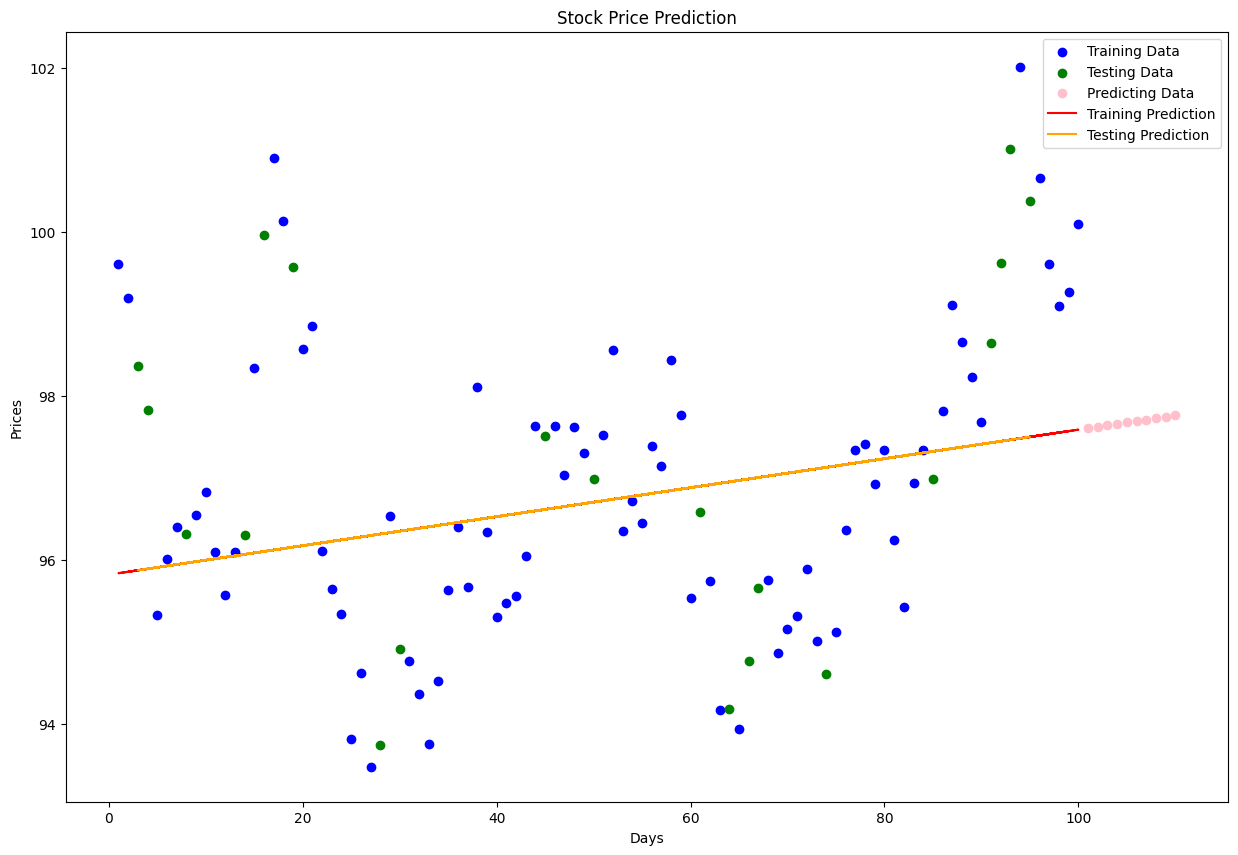

In [32]:
plt.figure(figsize=(15, 10))
plt.scatter(X_train, y_train, color='blue', label = 'Training Data')
plt.scatter(X_test, y_test, color='green', label = 'Testing Data')
plt.scatter(new_days, new_prices, color='pink', label = 'Predicting Data')
plt.plot(X_train, y_pred_train, color='red', label = 'Training Prediction')
plt.plot(X_test, y_pred_test, color='orange', label = 'Testing Prediction')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()